<center><h1>Fundamentos Data Science parte 1</h1><center>
    Autor: Walther Becks

<h2>Desafío 1: Determinantes del ingreso</h2>

Usted trabaja para un organismo no gubernamental que está interesado en las dinámicas
socioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobreza
extrema, enmarcado dentro de los objetivos del desarrollo del nuevo milenio del Programa
de las Naciones Unidas para el Desarrollo.
Le encomiendan el desarrollo de un **modelo predictivo** sobre la **probabilidad que un
individuo presente salarios por sobre o bajo los 50.000 dólares anuales**, en base a una serie
de atributos sociodemográficos.

**Datos Asociados: income-db.csv**

## Hito 1: Análisis Preliminar del problema

* Se pide desarrollar un modelo predictivo, se entiende que la validación es a través de Machine Learning.
* La variable del vector objetivo es categórica binarizada, y nos solicitan la ocurrencia de esta. Esto hace que el problema sea de regresión.

**Librerías a utilizar:** 

1. pandas == 1.2.0
2. numpy == 1.20.3
3. scipy == 1.7.3  
4. matplotlib == 3.0.3
5. seaborn == 0.11.2 
6. statsmodels == 0.13.2
7. conda == 4.8.3
8. python == 3.7.3
9. missingno == 0.5.1

-----------

## Hito 2

### Importe de librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import missingno
sns.set_style('darkgrid')

import statsmodels.api as sm
import statsmodels.formula.api as smf

warnings.filterwarnings('ignore')

#para dsps:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import functions
plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams["figure.dpi"] = 200
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

C:\Users\Walther\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\Walther\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path

<hr>

### Importe de datos

In [2]:
df = pd.read_csv('income-db.csv')
print(f"Tenemos {df.shape[0]} filas y {df.shape[1]} columnas")
df.head()

Tenemos 48842 filas y 15 columnas


age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

<hr>

### Limpieza de base de datos

#### Valores nulos

In [3]:
df = df.replace(to_replace='?',value= np.nan)
df.apply(lambda x: f"{round((x[x.isna()].shape[0]/x.shape[0])*100, 2)}%").sort_values(ascending = False).to_frame().rename(columns = {0:'% nulos'})

% nulos
occupation        5.75%
workclass         5.73%
native-country    1.75%
age                0.0%
fnlwgt             0.0%
education          0.0%
educational-num    0.0%
marital-status     0.0%
relationship       0.0%
race               0.0%
gender             0.0%
capital-gain       0.0%
capital-loss       0.0%
hours-per-week     0.0%
income             0.0%

<hr>

In [4]:
df_droped_na = df.dropna()
print(f"Se limpió la base de valores nulos, con lo que se consiguió conservar un {round(df_droped_na.shape[0]/df.shape[0]*100)}% de los datos, se perdieron {df.shape[0]-df_droped_na.shape[0]} filas.")

Se limpió la base de valores nulos, con lo que se consiguió conservar un 93% de los datos, se perdieron 3620 filas.


#### Recodificación de las variables

1. Utilizando el importe de functions, recodificaremos y binarizaremos las variables
2. Normalizaremos las varibles numéricas (excepto las binarias).

In [5]:
df_recodificacion = functions.recodificaciones(df_droped_na)
df_bin = pd.get_dummies(df_recodificacion, drop_first = True)
df_norm = df_bin.select_dtypes('int64').apply(lambda x: (x - x.mean())/x.std()).join(df_bin.select_dtypes('uint8'))
print(f"**De las {df_recodificacion.shape[1]} columnas originales, se procedió a agregar {df_bin.shape[1]-df_recodificacion.shape[1]} columnas binarias, dejando un total {df_bin.shape[1]} columnas**")

df_norm.head()

**De las 15 columnas originales, se procedió a agregar 18 columnas binarias, dejando un total 33 columnas**


age    fnlwgt  educational-num  capital-gain  capital-loss  \
0 -1.024972  0.350886        -1.221545     -0.146732     -0.218778   
1 -0.041455 -0.945868        -0.438117     -0.146732     -0.218778   
2 -0.798006  1.393576         0.737026     -0.146732     -0.218778   
3  0.412476 -0.278417        -0.046402      0.877457     -0.218778   
5 -0.344075  0.084801        -1.613260     -0.146732     -0.218778   

   hours-per-week  relationship_Not-in-family  relationship_Other-relative  \
0       -0.078119                           0                            0   
1        0.754693                           0                            0   
2       -0.078119                           0                            0   
3       -0.078119                           0                            0   
5       -0.910931                           1                            0   

   relationship_Own-child  relationship_Unmarried  relationship_Wife  \
0                       1                       0                  0   
1                       0                       0                  0   
2                       0                       0                  0   
3                       0                       0                  0   
5                       0                       0                  0   

   race_Asian-Pac-Islander  race_Black  race_Other  race_White  gender_Male  \
0                        0           1           0           0            1   
1                        0           0           0           1            1   
2                        0           0           0           1            1   
3                        0           1           0           0            1   
5                        0           0           0           1            1   

   income_>50K  collars_others  collars_white-collar  workclass_recod_private  \
0            0               0                     0                        1   
1            0               0                     0                        1   
2            1               0                     0                        0   
3            1               0                     0                        1   
5            0               1                     0                        1   

   workclass_recod_self-employed  workclass_recod_state-level-gov  \
0                              0                                0   
1                              0                                0   
2                              0                                1   
3                              0                                0   
5                              0                                0   

   workclass_recod_unemployed  educ_recod_elementary-school  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
5                           0                             0   

   educ_recod_high-school  educ_recod_preschool  educ_recod_university  \
0                       1                     0                      0   
1                       1                     0                      0   
2                       0                     0                      0   
3                       0                     0                      0   
5                       1                     0                      0   

   civstatus_married  civstatus_never-married  civstatus_separated  \
0                  0                        1                    0   
1                  1                        0                    0   
2                  1                        0                    0   
3                  1                        0                    0   
5                  0                        1                    0   

   civstatus_widowed  region_asia  region_europa  
0           

In [6]:
df_norm.columns = [i.replace('-','_').replace('>', 'more_than_') for i in df_norm.columns]
print("Finalmente se procedió a reemplazar los guiones y signos no compatibles con las librerías de machine learning")
df_norm.columns.to_list()

Finalmente se procedió a reemplazar los guiones y signos no compatibles con las librerías de machine learning


['age',
 'fnlwgt',
 'educational_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'relationship_Not_in_family',
 'relationship_Other_relative',
 'relationship_Own_child',
 'relationship_Unmarried',
 'relationship_Wife',
 'race_Asian_Pac_Islander',
 'race_Black',
 'race_Other',
 'race_White',
 'gender_Male',
 'income_more_than_50K',
 'collars_others',
 'collars_white_collar',
 'workclass_recod_private',
 'workclass_recod_self_employed',
 'workclass_recod_state_level_gov',
 'workclass_recod_unemployed',
 'educ_recod_elementary_school',
 'educ_recod_high_school',
 'educ_recod_preschool',
 'educ_recod_university',
 'civstatus_married',
 'civstatus_never_married',
 'civstatus_separated',
 'civstatus_widowed',
 'region_asia',
 'region_europa']

### Inspección de variables

#### Variables categóricas

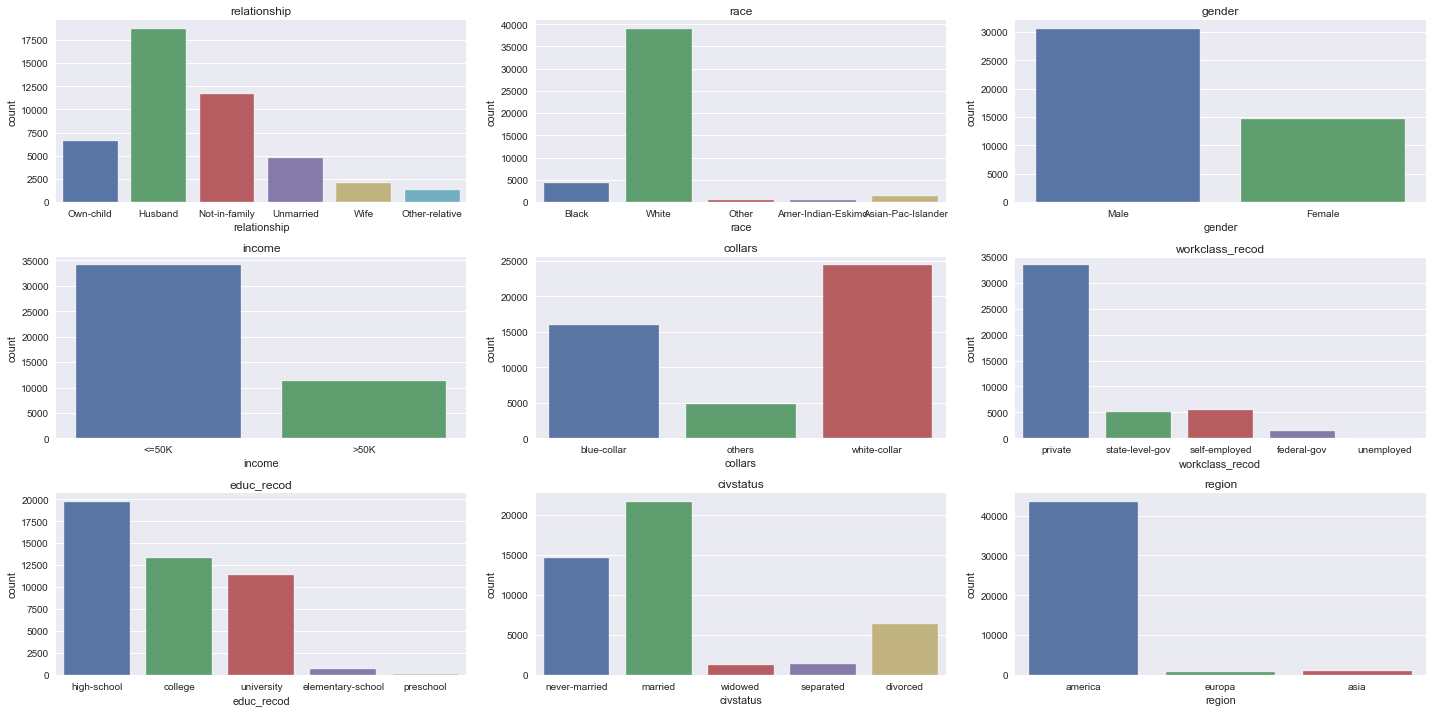

In [7]:
plt.figure(figsize = (20,10))
for i, column in enumerate(df_recodificacion.select_dtypes('O').columns):
    
    plt.subplot(3,3,i+1)
    plt.title(column)
    sns.countplot(df_recodificacion[column])
plt.tight_layout()

- Podemos observar que la muestra está sesgada por una predominancia de observaciones del continente americano, del sector privado y de raza blanca. Finalmente, el vector objetivo está sesgado en la muestra también, inclinandose por personas que ganan más de 50 mil USD.

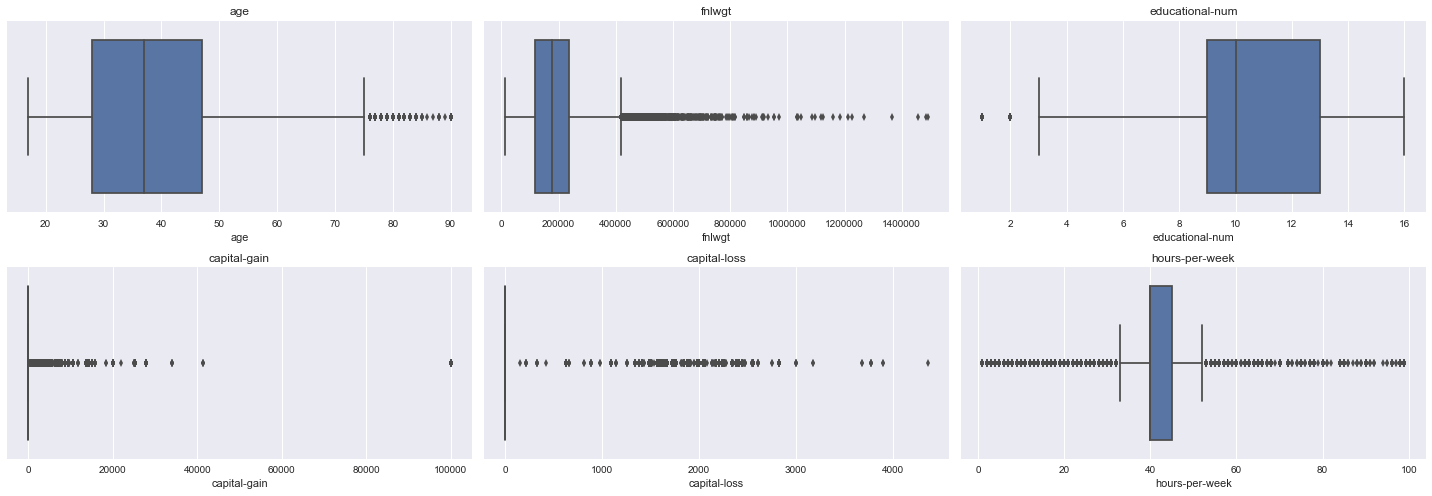

In [8]:
plt.figure(figsize = (20,10))
for i, column in enumerate(df_recodificacion.select_dtypes('int64').columns):
    plt.subplot(3,3,i+1)
    plt.title(column)
    sns.boxplot(df_recodificacion[column])
plt.tight_layout()

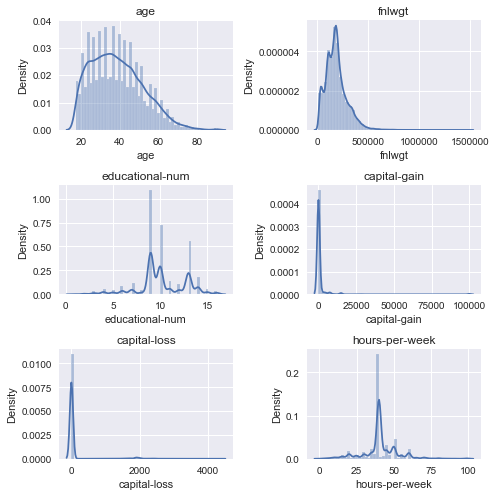

In [9]:
plt.figure(figsize = (7,7))
for i, column in enumerate(df_recodificacion.select_dtypes('int64').columns):
    
    plt.subplot(3,2,i+1)
    plt.title(column)
    sns.distplot(df_recodificacion[column])
plt.tight_layout()

- En los datos númericos encontramos gran variabilidad, las variables capital-gain y capital-loss parecen estar concentradas en cero.
- La variable hours-per-week muestra una alta concentracion entorno a una media de 40 horas semanales, que se asemeja a una distribución normal. 
- La variable educational-num muestra 3 tipos de modas. 